In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500

In [3]:
# Merge the two food.com datasets
rec1 = pd.read_csv('../data/recipes.csv')
rec1.rename({'RecipeId': 'id'}, axis=1, inplace=True)
rec2 = pd.read_csv('../data/recipes_w_search_terms.csv')
rec = pd.merge(rec1, rec2, on='id')

In [4]:
df = rec.drop(['name', 'ingredients', 'RecipeInstructions', 'RecipeServings'], axis=1)

In [5]:
df.head()

,id,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeYield,description,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen Dessert recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"", ""Healthy"", ""Free Of..."", ""Summer"", ""Weeknight"", ""...","c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla yogurt"", ""lemon juice"")",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,NaN,"This is yummy and low-fat, it always turns out perfect.","[""4 cups blueberries, fresh or frozen "",""1/4 cup granulated sugar"",""1 cup vanilla ...",1 (225 g),4,"['Toss 2 cups berries with sugar.', 'Let stand for 45 minutes, stirring occasionally.', 'Transfe...","['weeknight', 'time-to-make', 'course', 'preparation', 'occasion', 'low-protein', 'healthy', '5-...","{'low-calorie', 'low-sodium', 'dessert', 'healthy', 'gluten-free', 'low-fat'}"
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"", ""Meat"", ""Asian"", ""Indian"", ""Weeknight"", ""Stove Top"")","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ""1"", ""1"", ""1/4"", ""1/4"", ""1/2"", ""1/4"", ""2"", ""3"", NA...","c(""saffron"", ""milk"", ""hot green chili peppers"", ""onions"", ""garlic"", ""clove"", ""peppercorns"", ""car...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,NaN,"Delhi, India","[""1 tablespoon saffron"",""4 teaspoons milk, warm "",""2 hot green chili peppers, as...",1 (799 g),6,"['Soak saffron in warm milk for 5 minutes and puree in blender.', 'Add chiles, onions, ginger, g...","['weeknight', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'main-dish'...","{'indian', 'dinner', 'low-sodium'}"
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keeping cookbooks. You must use a *zester* in order to...,"c(""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"", ""Summer"", ""< 60 Mins"")","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of"", ""fresh water"", ""fresh lemon juice"")",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,NaN,This is from one of my first Good House Keeping cookbooks. You must use a *zester* in order to...,"[""1 1/2 cups sugar"",""1 tablespoon lemons, rind of or 1 tablespoon lemon, zest of, ...",1 (212 g),4,"['Into a 1 quart Jar with tight fitting lid, put sugar and lemon peel, or zest; add 1 1/2 cups ...","['60-minutes-or-less', 'time-to-make', 'course', 'preparation', 'occasion', 'low-protein', 'heal...","{'healthy', 'low-fat', 'low-sodium'}"
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to allow the ingredients to soak in the marinade ov...,"c(""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""Weeknight"", ""Broil/Grill"", ""Oven"")","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2"", ""2"", ""1"", ""2"", ""1/2"", ""1/4"", ""4"")","c(""extra firm tofu

In [6]:
ing = df[['id', 'Name', 'RecipeIngredientParts', 'serving_size', 'servings', 'Calories' ]]

In [7]:
ing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494949 entries, 0 to 494948
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     494949 non-null  int64  
 1   Name                   494949 non-null  object 
 2   RecipeIngredientParts  494949 non-null  object 
 3   serving_size           494949 non-null  object 
 4   servings               494949 non-null  int64  
 5   Calories               494949 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 26.4+ MB


In [8]:
i = ing.RecipeIngredientParts.apply(lambda x: x[2:-1])
ing.RecipeIngredientParts = i

C:\Users\iason\miniconda3\envs\bootcamp\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
ing.RecipeIngredientParts.str.split(', ')

0                                        ["blueberries", "granulated sugar", "vanilla yogurt", "lemon juice"]
1         ["saffron", "milk", "hot green chili peppers", "onions", "garlic", "clove", "peppercorns", "card...
2                          ["sugar", "lemons, rind of", "lemon, zest of", "fresh water", "fresh lemon juice"]
3         ["extra firm tofu", "eggplant", "zucchini", "mushrooms", "soy sauce", "low sodium soy sauce", "o...
4                                             ["plain tomato juice", "cabbage", "onion", "carrots", "celery"]
                                                         ...                                                 
494944          ["barbecue sauce", "smoked gouda cheese", "mozzarella cheese", "red onion", "fresh cilantro"]
494945    ["chicken thighs", "bell pepper", "cream cheese", "chili powder", "kosher salt", "bacon", "scall...
494946    ["salted butter", "ghee", "fresh lemon juice", "garlic", "red pepper flakes", "shrimp", "chicken...
494947    

In [10]:
ing_lists = ing.RecipeIngredientParts.str.split(', ')
ing.RecipeIngredientParts = ing_lists

In [11]:
ing = ing.rename(columns={'RecipeIngredientParts': 'ingredients'})

In [12]:
ing['serving_gr'] = ing.serving_size.apply(lambda x: x.split('(')[1].split(' ')[0]).astype(float)

In [13]:
df1 = ing.explode(column='ingredients')

In [14]:
df1.ingredients = df1.ingredients.str.replace('\"', '', regex=True).str.replace('^\\n', '', regex=True)
df1.ingredients = df1.ingredients.apply(lambda x: x.lower() if type(x) == str else x)

In [15]:
df1.head()

,id,Name,ingredients,serving_size,servings,Calories,serving_gr
0,38,Low-Fat Berry Blue Frozen Dessert,blueberries,1 (225 g),4,170.9,225.0
0,38,Low-Fat Berry Blue Frozen Dessert,granulated sugar,1 (225 g),4,170.9,225.0
0,38,Low-Fat Berry Blue Frozen Dessert,vanilla yogurt,1 (225 g),4,170.9,225.0
0,38,Low-Fat Berry Blue Frozen Dessert,lemon juice,1 (225 g),4,170.9,225.0
1,39,Biryani,saffron,1 (799 g),6,1110.7,799.0


In [16]:
# https://foodb.ca/foods/FOOD00002
foods = pd.read_csv('../data/Food.csv')

In [17]:
foods.food_group.value_counts()

Aquatic foods                  169
Fruits                         157
Vegetables                     147
Herbs and Spices               126
Dishes                          51
Cereals and cereal products     50
Beverages                       38
Milk and milk products          36
Baking goods                    33
Animal foods                    29
Confectioneries                 29
Pulses                          28
Nuts                            27
Gourds                          19
Soy                              9
Cocoa and cocoa products         8
Snack foods                      8
Fats and oils                    8
Teas                             7
Coffee and coffee products       5
Eggs                             2
Baby foods                       1
Unclassified                     1
Herbs and spices                 1
Name: food_group, dtype: int64

In [18]:
foods = foods.iloc[:, :14]

In [19]:
foods = foods[['id', 'name', 'food_group', 'food_subgroup', 'legacy_id',]]

In [20]:
foods = foods.dropna(subset=['food_group'])

In [21]:
foods = foods.apply(lambda x: x.str.lower() if x.dtype == object else x)

In [22]:
foods = foods.drop(407)
foods = foods.drop(497)

In [23]:
contents = pd.read_csv('../data/foodb_2020_4_7/Content.csv', low_memory=False)

In [24]:
nutri = contents[['source_type', 'food_id', 'orig_food_common_name', 
                  'orig_source_name', 'orig_content', 'orig_unit']]

In [25]:
nutri = nutri[nutri.source_type == 'Nutrient']
mask = nutri.orig_source_name.isin(['Energy'])
nutri = nutri.mask(~mask)
nutri = nutri.dropna(subset=['orig_source_name']).reset_index(drop=True)
nutri.rename(columns={'food_id': 'id'}, inplace=True)
nutri.id = nutri.id.astype(int)

In [26]:
merged = pd.merge(foods, nutri, on='id')

In [27]:
merged = merged.apply(lambda x: x.str.lower() if x.dtype == object else x)

In [28]:
merged[merged.food_group=='snack foods'].shape

(440, 10)

In [170]:
uniq = (df1.groupby('ingredients').agg({'id': 'count', 'serving_gr': 'median', 'Calories': 'median'})
        .sort_values(by='id', ascending=False)
        .reset_index()
        .rename(columns={'id': 'counts'}))

In [171]:
uniq = uniq[uniq.counts > 20]

In [172]:
uniq.head()

,ingredients,counts,serving_gr,Calories
0,salt,191769,229.0,332.8
1,butter,131391,209.0,379.0
2,sugar,109907,183.0,339.3
3,onion,84750,290.0,366.4
4,water,79356,282.0,334.3


In [173]:
# masks for common ingredients
water = uniq.ingredients.str.contains('.*water.*')
uniq = uniq[~water]
salt = uniq.ingredients.str.contains('.*salt.*')
sugar = uniq.ingredients.str.contains('.*sugar.*')
oil = uniq.ingredients.str.contains('.*oil.*')
pepper = uniq.ingredients.str.contains('.*pepper.*')
flour = uniq.ingredients.str.contains('.*flour.*')
baking = uniq.ingredients.str.contains('.*baking.*')
uniq = uniq[~baking]

In [174]:
uniq.loc[:, 'id'] = np.zeros(uniq.shape[0], dtype=int) -1

In [175]:
uniq

,ingredients,counts,serving_gr,Calories,id
0,salt,191769,229.0,332.8,-1
1,butter,131391,209.0,379.0,-1
2,sugar,109907,183.0,339.3,-1
3,onion,84750,290.0,366.4,-1
5,eggs,78953,179.0,375.4,-1
...,...,...,...,...,...
3353,leaf oregano,21,264.0,475.8,-1
3354,quorn pieces,21,191.0,232.3,-1
3355,panang curry paste,21,260.0,603.2,-1
3356,lamb necks,21,306.0,257.6,-1


In [176]:
def assign_groups_1on1(row):
    #check first if the whole ingredient is contained in the food list
    common = foods[foods.name == row.ingredients]
    if common.shape[0] == 1:
        row.id = common.id.values[0]
    return row

        

In [177]:
def assign_groups_contains(row):
    #check first if the whole ingredient is contained in the food list
    if row.id == -1:
        try:
            common = foods[foods.name.str.contains(row.ingredients)]
            if common.shape[0] > 0:
                row.id = common.id.values[0]
        except:
            pass

    return row

In [178]:
def assign_groups_contains_part(row):
    #check first if the whole ingredient is contained in the food list
    if row.id == -1:
        ings = row.ingredients.split()
        for i in ings[::-1]:
            try:
                common = foods[foods.name.str.contains(i)]
                if common.shape[0] > 0:
                    row.id = common.id.values[0]
                    break
            except:
                continue

    return row

In [179]:
def assign_groups_contains_part_plural(row):
    #check first if the whole ingredient is contained in the food list
    if row.id == -1:
        ings = row.ingredients.split()
        for i in ings[::-1]:
            if i[-1] == 's':
                i = i[:-1]
            try:
                common = foods[foods.name.str.contains(i)]
                if common.shape[0] > 0:
                    row.id = common.id.values[0]
                    break
            except:
                continue

    return row

In [180]:
uniq = uniq.apply(assign_groups_1on1, axis=1)

In [181]:
uniq = uniq.apply(assign_groups_contains, axis=1)

In [182]:
uniq = uniq.apply(assign_groups_contains_part, axis=1)

In [183]:
uniq = uniq.apply(assign_groups_contains_part_plural, axis=1)

In [184]:
uniq.shape

(3307, 5)

In [204]:
uniq.loc[uniq.ingredients.str.contains('onions'), 'id'] = 6
uniq.loc[uniq.ingredients.str.contains('onion powder'), 'id'] = 6
uniq.loc[uniq.ingredients.str.contains('tomatoes'), 'id'] = 171
uniq.loc[uniq.ingredients.str.contains('paprika'), 'id'] = 139
uniq.loc[uniq.ingredients.str.contains('black pepper'), 'id'] = 139
uniq.loc[uniq.ingredients.str.contains('white pepper'), 'id'] = 139
uniq.loc[uniq.ingredients.str.contains('red pepper'), 'id'] = 139
uniq.loc[uniq.ingredients.str.contains('mixed pepper'), 'id'] = 139
uniq.loc[uniq.ingredients.str.contains('bacon'), 'id'] = 549
uniq.loc[uniq.ingredients.str.contains('^ham|ham$'), 'id'] = 549
uniq.loc[uniq.ingredients.str.contains('prosciutto'), 'id'] = 549
uniq.loc[uniq.ingredients.str.contains('pork'), 'id'] = 549
uniq.loc[uniq.ingredients.str.contains('pancetta'), 'id'] = 549
uniq.loc[uniq.ingredients.str.contains('potatoes|french fries'), 'id'] = 175
uniq.loc[uniq.ingredients.str.contains('cilantro'), 'id'] = 61
uniq.loc[uniq.ingredients.str.contains('scallions'), 'id'] = 6
uniq.loc[uniq.ingredients.str.contains('scallion'), 'id'] = 6
uniq.loc[uniq.ingredients.str.contains('cayenne'), 'id'] = 139
uniq.loc[uniq.ingredients.str.contains('cornmeal'), 'id'] = 825
uniq.loc[uniq.ingredients.str.contains('cornflour'), 'id'] = 825
uniq.loc[uniq.ingredients.str.contains('strawberries'), 'id'] = 83
uniq.loc[uniq.ingredients.str.contains('cranberries'), 'id'] = 83
uniq.loc[uniq.ingredients.str.contains('rasberries'), 'id'] = 160
uniq.loc[uniq.ingredients.str.contains('berries'), 'id'] = 160
uniq.loc[uniq.ingredients.str.contains('raspberries'), 'id'] = 160
uniq.loc[uniq.ingredients.str.contains('blueberries'), 'id'] = 160
uniq.loc[uniq.ingredients.str.contains('gingerroot'), 'id'] = 206
uniq.loc[uniq.ingredients.str.contains('ginger powder'), 'id'] = 206
uniq.loc[uniq.ingredients.str.contains('fresh ginger'), 'id'] = 206
uniq.loc[uniq.ingredients.str.contains('spaghetti'), 'id'] = 274
uniq.loc[uniq.ingredients.str.contains('penne'), 'id'] = 274
uniq.loc[uniq.ingredients.str.contains('linguine'), 'id'] = 274
uniq.loc[uniq.ingredients.str.contains('macaroni'), 'id'] = 274
uniq.loc[uniq.ingredients.str.contains('oatmeal'), 'id'] = 22
uniq.loc[uniq.ingredients.str.contains('soymilk'), 'id'] = 761
uniq.loc[uniq.ingredients.str.contains('Cool Whip'), 'id'] = 737
uniq.loc[uniq.ingredients.str.contains('half-and-half'), 'id'] = 669
uniq.loc[uniq.ingredients.str.contains('creme fraiche'), 'id'] = 985
uniq.loc[uniq.ingredients.str.contains('heavy cream'), 'id'] = 669
uniq.loc[uniq.ingredients.str.contains('heavy whipping cream'), 'id'] = 669
uniq.loc[uniq.ingredients.str.contains('whipped cream'), 'id'] = 669
uniq.loc[uniq.ingredients.str.contains('irish cream'), 'id'] = 669
uniq.loc[uniq.ingredients.str.contains('mangoes'), 'id'] = 106
uniq.loc[uniq.ingredients.str.contains('mirin'), 'id'] = 628
uniq.loc[uniq.ingredients.str.contains('baguette|crouton'), 'id'] = 1019
uniq.loc[uniq.ingredients.str.contains('cherries'), 'id'] = 143
uniq.loc[uniq.ingredients.str.contains('gorgonzola'), 'id'] = 983
uniq.loc[uniq.ingredients.str.contains('yoghurt|yogurt'), 'id'] = 634
uniq.loc[uniq.ingredients.str.contains('chilies'), 'id'] = 987
uniq.loc[uniq.ingredients.str.contains('cornstarch'), 'id'] = 205
uniq.loc[uniq.ingredients.str.contains('unsalted butter'), 'id'] = 667
uniq.loc[uniq.ingredients.str.contains('light butter'), 'id'] = 667
uniq.loc[uniq.ingredients.str.contains('sweet butter'), 'id'] = 667
uniq.loc[uniq.ingredients.str.contains('real butter'), 'id'] = 667
uniq.loc[uniq.ingredients.str.contains('sweet creamy butter'), 'id'] = 667
uniq.loc[uniq.ingredients.str.contains('butter lettuce leaves'), 'id'] = 95
uniq.loc[uniq.ingredients.str.contains('brown sugar'), 'id'] = 670
uniq.loc[uniq.ingredients.str.contains('white sugar'), 'id'] = 670
uniq.loc[uniq.ingredients.str.contains('palm sugar|fine sugar'), 'id'] = 670
uniq.loc[uniq.ingredients.str.contains('powdered sugar'), 'id'] = 670
uniq.loc[uniq.ingredients.str.contains('granulated sugar'), 'id'] = 670
uniq.loc[uniq.ingredients.str.contains('raw sugar'), 'id'] = 670
uniq.loc[uniq.ingredients.str.contains('caster sugar'), 'id'] = 670
uniq.loc[uniq.ingredients.str.contains('lemon juice'), 'id'] = 54
uniq.loc[uniq.ingredients.str.contains('lemons'), 'id'] = 54
uniq.loc[uniq.ingredients.str.contains('lemon zest'), 'id'] = 54
uniq.loc[uniq.ingredients.str.contains('extra virgin olive oil'), 'id'] = 941
uniq.loc[uniq.ingredients.str.contains('fresh parsley'), 'id'] = 131
uniq.loc[uniq.ingredients.str.contains('beef'), 'id'] = 506
uniq.loc[uniq.ingredients.str.contains('raisin'), 'id'] = 203
uniq.loc[uniq.ingredients.str.contains('marjoram'), 'id'] = 122
uniq.loc[uniq.ingredients.str.contains('tomato paste'), 'id'] = 171
uniq.loc[uniq.ingredients.str.contains('bay leaf'), 'id'] = 97
uniq.loc[uniq.ingredients.str.contains('peanut'), 'id'] = 16
uniq.loc[uniq.ingredients.str.contains('cashew'), 'id'] = 11
uniq.loc[uniq.ingredients.str.contains('lime'), 'id'] = 53
uniq.loc[uniq.ingredients=='egg', 'id'] = 633
uniq.loc[uniq.ingredients.str.contains('black beans'), 'id'] = 638
uniq.loc[uniq.ingredients.str.contains('white beans'), 'id'] = 638
uniq.loc[uniq.ingredients.str.contains('red beans|great northern bean'), 'id'] = 638
uniq.loc[uniq.ingredients.str.contains('olives'), 'id'] = 121
uniq.loc[uniq.ingredients.str.contains('mustard'), 'id'] = 420
uniq.loc[uniq.ingredients.str.contains('beans'), 'id'] = 134
uniq.loc[uniq.ingredients.str.contains('garbanzo beans'), 'id'] = 134
uniq.loc[uniq.ingredients.str.contains('mint'), 'id'] = 113
uniq.loc[uniq.ingredients.str.contains('tartar'), 'id'] = 435
uniq.loc[uniq.ingredients.str.contains('splenda sugar sabstitute'), 'id'] = 676
uniq.loc[uniq.ingredients.str.contains('corn$'), 'id'] = 205
uniq.loc[uniq.ingredients.str.contains('peppers'), 'id'] = 40
uniq.loc[uniq.ingredients.str.contains('pimiento|pimento'), 'id'] = 40
uniq.loc[uniq.ingredients.str.contains('peas'), 'id'] = 141
uniq.loc[uniq.ingredients.str.contains('apple'), 'id'] = 105
uniq.loc[uniq.ingredients.str.contains('garlic'), 'id'] = 8
uniq.loc[uniq.ingredients.str.contains('pears'), 'id'] = 152
uniq.loc[uniq.ingredients.str.contains('pumpkin'), 'id'] = 918
uniq.loc[uniq.ingredients.str.contains('arugula'), 'id'] = 77
uniq.loc[uniq.ingredients.str.contains('lettuce'), 'id'] = 95
uniq.loc[uniq.ingredients.str.contains('soy sauce'), 'id'] = 716
uniq.loc[uniq.ingredients.str.contains('lamb'), 'id'] = 483
uniq.loc[uniq.ingredients.str.contains('lambsquarters'), 'id'] = 399
uniq.loc[uniq.ingredients.str.contains('rice wine'), 'id'] = 628
uniq.loc[uniq.ingredients.str.contains('ginger ale'), 'id'] = 268
uniq.loc[uniq.ingredients.str.contains('scallop'), 'id'] = 472
uniq.loc[uniq.ingredients.str.contains('spinach'), 'id'] = 178
uniq.loc[uniq.ingredients.str.contains('lemon slice'), 'id'] = 54
uniq.loc[uniq.ingredients.str.contains('biscuit'), 'id'] = 275
uniq.loc[uniq.ingredients.str.contains('tortillas'), 'id'] = 733
uniq.loc[uniq.ingredients.str.contains('grapes'), 'id'] = 374
uniq.loc[uniq.ingredients.str.contains('gruyere'), 'id'] = 631
uniq.loc[uniq.ingredients.str.contains('polenta'), 'id'] = 205
uniq.loc[uniq.ingredients.str.contains('stevia'), 'id'] = 676
uniq.loc[uniq.ingredients.str.contains('edamame'), 'id'] = 85
uniq.loc[uniq.ingredients.str.contains('harissa'), 'id'] = 700
uniq.loc[uniq.ingredients.str.contains('prune'), 'id'] = 143
uniq.loc[uniq.ingredients.str.contains('mascarpone'), 'id'] = 631
uniq.loc[uniq.ingredients.str.contains('curry paste|wasabi paste'), 'id'] = 700
uniq.loc[uniq.ingredients.str.contains('figs'), 'id'] = 81
uniq.loc[uniq.ingredients.str.contains('flounder'), 'id'] = 896
uniq.loc[uniq.ingredients.str.contains('mahi mahi'), 'id'] = 896
uniq.loc[uniq.ingredients.str.contains('cardamoms|cardamom'), 'id'] = 74
uniq.loc[uniq.ingredients.str.contains('yeast'), 'id'] = 9999
uniq.loc[uniq.ingredients.str.contains('chicken'), 'id'] = 334
uniq.loc[uniq.ingredients.str.contains('green onion'), 'id'] = 995
uniq.loc[uniq.ingredients.str.contains('lemon'), 'id'] = 54
uniq.loc[uniq.ingredients.str.contains('lemon grass'), 'id'] = 70
uniq.loc[uniq.ingredients.str.contains('lemon thyme'), 'id'] = 238
uniq.loc[uniq.ingredients.str.contains('lemon sole'), 'id'] = 597
uniq.loc[uniq.ingredients.str.contains('^ale$'), 'id'] = 268
uniq.loc[uniq.ingredients.str.contains('^beefsteak tomatoes'), 'id'] = 171
uniq.loc[uniq.ingredients.str.contains('lobster'), 'id'] = 598
uniq.loc[uniq.ingredients.str.contains('clams'), 'id'] = 984
uniq.loc[uniq.ingredients.str.contains('blue curacao'), 'id'] = 630
uniq.loc[uniq.ingredients.str.contains('dried dates'), 'id'] = 135
uniq.loc[uniq.ingredients.str.contains('shrimp'), 'id'] = 546
uniq.loc[uniq.ingredients.str.contains('currant'), 'id'] = 155
uniq.loc[uniq.ingredients.str.contains('pineapple|anana'), 'id'] = 12
uniq.loc[uniq.ingredients.str.contains('carrot'), 'id'] = 72
uniq.loc[uniq.ingredients.str.contains('courgette'), 'id'] = 907
uniq.loc[uniq.ingredients.str.contains('milk powder'), 'id'] = 632
uniq.loc[uniq.ingredients.str.contains('seitan'), 'id'] = 187
uniq.loc[uniq.ingredients.str.contains('pernod'), 'id'] = 630
uniq.loc[uniq.ingredients.str.contains('rump steak'), 'id'] = 506
uniq.loc[uniq.ingredients.str.contains('diced tomatoes'), 'id'] = 171
uniq.loc[uniq.ingredients.str.contains('tuna'), 'id'] = 308
uniq.loc[uniq.ingredients.str.contains('brandy|malibu rum|golden rum'), 'id'] = 630
uniq.loc[uniq.ingredients.str.contains('aubergine'), 'id'] = 173
uniq.loc[uniq.ingredients.str.contains('cabbage'), 'id'] = 30
uniq.loc[uniq.ingredients.str.contains('chilis'), 'id'] = 987
uniq.loc[uniq.ingredients.str.contains('masala'), 'id'] = 700
uniq.loc[uniq.ingredients.str.contains('crawfish'), 'id'] = 404
uniq.loc[uniq.ingredients.str.contains('salsa'), 'id'] = 665
uniq.loc[uniq.ingredients.str.contains("confectioners' sugar"), 'id'] = 670
uniq.loc[uniq.ingredients.str.contains("coconut milk"), 'id'] = 970
uniq.loc[uniq.ingredients.str.contains("almond milk"), 'id'] = 969
uniq.loc[uniq.ingredients.str.contains("soy milk"), 'id'] = 761
uniq.loc[uniq.ingredients.str.contains("sour cream"), 'id'] = 985

In [205]:
# move oils from herbs to fats and oils
foods.loc[foods.food_subgroup == 'oilseed crops', 'food_group'] = 'fats and oils'

In [206]:
foods[foods.name.str.contains('sour cream')]

,id,name,food_group,food_subgroup,legacy_id
952,985,sour cream,milk and milk products,other milk products,NaN


In [207]:
sun = uniq.merge(foods, on='id', how='left')

In [208]:
sun = sun.drop(174) # zest of
sun = sun.drop(202) # juice of
sun = sun.drop(415)
sun = sun.drop(1450)
sun = sun.drop(1782)

In [209]:
sun1 = sun[~sun.food_group.isin(['dishes', 'teas', 'snack foods', 'baby foods', 'beverages', 
                                'baking goods', 'coffee and coffee products'])]

In [216]:
sun1.ingredients = sun1.ingredients.replace({'eggs': 'egg', 'onions': 'onion', 'tomatoes': 'tomato', 'lemons': 'lemon',
                                            'apples': 'apple', 'oranges': 'orange', 'limes': 'lime', 'cucumbers': 'cucumber',
                                            'bananas': 'banana', 'strawberries': 'strawberry', 'carrots': 'carrot', 
                                            'mushrooms': 'mushrooms', 'potatoes': 'potato', 'garlic cloves': 'garlic'})


In [217]:
sun1 = sun1.replace({'pulses': 'legumes', 'gourds': 'fruits', 'soy': 'legumes',
                  'cereals and cereal products': 'cereals', 'animal foods': 'animal', 'aquatic foods': 'aquatic',
                  })

In [218]:
sun1 = sun1.dropna(subset=['food_group'])

In [219]:
sun1

,ingredients,counts,serving_gr,Calories,id,name,food_group,food_subgroup,legacy_id
1,butter,131391,209.0,379.0,667,butter,milk and milk products,other milk products,NaN
3,onion,84750,290.0,366.4,6,garden onion,vegetables,onion-family vegetables,6.0
4,egg,78953,179.0,375.4,633,eggs,eggs,eggs,661.0
5,olive oil,73782,265.0,360.2,941,olive oil,fats and oils,oilseed crops,NaN
6,flour,60481,219.0,370.2,825,flour,cereals,cereal products,NaN
...,...,...,...,...,...,...,...,...,...
3298,celery & tops,21,343.0,241.9,15,wild celery,herbs and spices,spices,15.0
3302,leaf oregano,21,264.0,475.8,102,mexican oregano,herbs and spices,herbs,109.0
3304,panang curry paste,21,260.0,603.2,700,curry powder,herbs and spices,herb and spice mixtures,NaN
3305,lamb necks,21,306.0,257.6,483,"sheep (mutton, lamb)",animal,ovis,510.0


In [222]:
sun2 = sun1[sun1.counts >= 100]

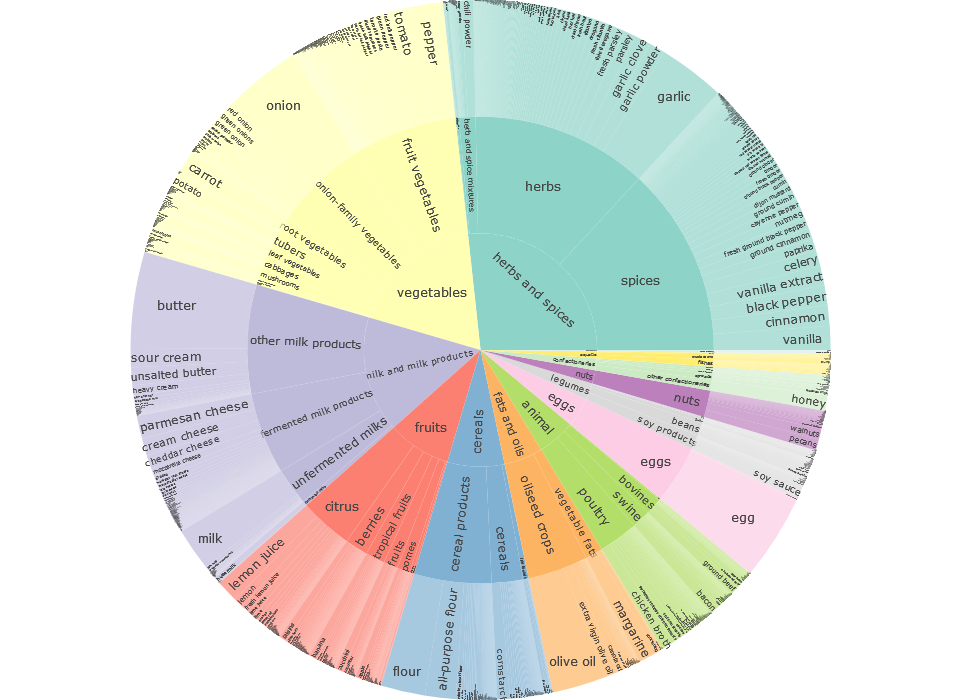

In [223]:

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
fig = px.sunburst(sun2, path=['food_group', 'food_subgroup', 'ingredients'], values='counts', 
                  height=700, width=1000, color_discrete_sequence=colors,
                 )
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'}, 
                  margin={"r":0,"t":0,"l":0,"b":0})
fig.show()